In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
tabela = pd.read_csv("dadosgovbr2014.csv",sep = ';', encoding="latin-1")
tabela.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [3]:
#1 - Qual a quantidade de reclamações registradas?
qtdeOcorrencias = tabela['Total'].count()
print('Número de ocorrências registradas: ',qtdeOcorrencias)

Número de ocorrências registradas:  43987


In [129]:
#2 - Qual é o tempo médio, máximo e mínimo de resposta?
print('Tempo médio de resposta: ',round(tabela['Tempo Resposta'].mean()))
print('Tempo máximo de resposta: ', tabela['Tempo Resposta'].max())
print('Tempo mínimo de resposta: ', tabela['Tempo Resposta'].min())

Tempo médio de resposta:  7
Tempo máximo de resposta:  13.0
Tempo mínimo de resposta:  0.0


In [4]:
#3 - Qual é a nota média, máxima e mínima do consumidor?
print('Nota média dos consumidores: ',round(tabela['Nota do Consumidor'].mean()))
print('Nota máxima dos consumidores: ',tabela['Nota do Consumidor'].max())
print('Nota mínima dos consumidores: ',tabela['Nota do Consumidor'].min())

Nota média dos consumidores:  3
Nota máxima dos consumidores:  5.0
Nota mínima dos consumidores:  1.0


Text(0, 0.5, 'Tempo de Resposta')

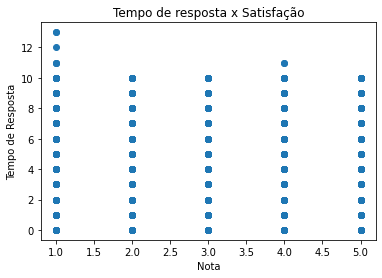

In [5]:
#4 - Como podemos correlacionar a nota do consumidor com o tempo de resposta? Explique.
# Para subsidiar a resposta, apresento um gráfico construído através de DataFrame, correlacionando as duas variáveis
dfNotaTempo = pd.DataFrame({
    'Nota':tabela['Nota do Consumidor'],
    'Tempo': tabela['Tempo Resposta']
})
plt.scatter(dfNotaTempo['Nota'],dfNotaTempo['Tempo'])
plt.title('Tempo de resposta x Satisfação')
plt.xlabel('Nota')
plt.ylabel('Tempo de Resposta')


### Conclusão:
- É possivél percerber uma certa uniformidade, entre os níveis de satisfação. Até 10 minutos, as notas são bem distribuídas, mas é possível perceber que a maioria das notás mínimas foram dadas a atendimentos que ultrapassaram este limite de tempo
- Deste modo, a seguinte conclusão se apresenta:
    - O nível de satisfação dos consumidores tem um threshold que é atingigo em 10 minutos de tempo de resposta. Nenhuma das avaliações máximas ultrapassou a marca. Deste modo, é preciso criar um workflow e ferramentas que possibilitem a solução de problemas dentro deste time frame

In [6]:
#5 - Qual a quantidade de reclamações por Sexo?
sexo = tabela['Sexo'].value_counts().tolist()
homens = sexo[0]
mulheres = sexo[1]
#print(sexo)
print('Quantidade de reclamações de homens: ',homens)
print('Quantidade de reclamações dde mulheres: ', mulheres)

Quantidade de reclamações de homens:  27895
Quantidade de reclamações dde mulheres:  16092


Text(0, 0.5, 'Frequência')

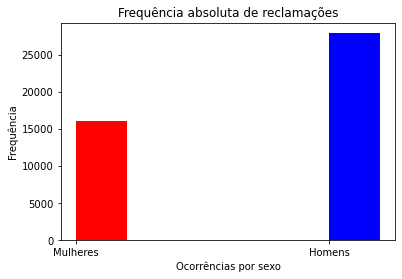

In [7]:
# 5.a) a) Frequência de reclamações por sexo
# Gráfico de frequência absoluta
t = ['Mulheres','Homens']
colors = ['red','blue']
plt.bar(t,(sexo[1],sexo[0]),width=0.2,align = 'edge',color=colors)
plt.title('Frequência absoluta de reclamações')
#plt.legend('best')
plt.xlabel('Ocorrências por sexo')
plt.ylabel('Frequência')

Text(0.5, 1.0, 'Frequência relativa de reclamações')

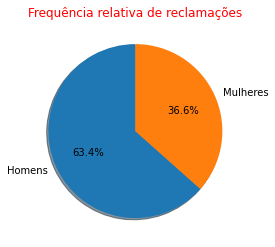

In [8]:
#5.a Gráfico de frequência relativa
labels='Homens','Mulheres'
numbersSex = [homens,mulheres]
plt.pie(numbersSex,explode=None,labels = labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Frequência relativa de reclamações', color='red')

Text(0.5, 0, 'Estado de Origem')

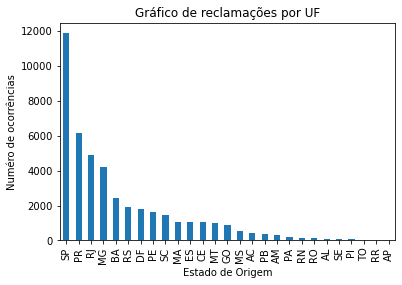

In [124]:
#5.b Gráfico de reclamações por Estados
estados = tabela['UF'].value_counts()
graphUF = estados.plot(kind='bar')
graphUF.set_title('Gráfico de reclamações por UF')
graphUF.set_ylabel('Numéro de ocorrências')
graphUF.set_xlabel('Estado de Origem')

In [127]:
#5.c Frequência de reclamações respondidas e não respondidas
status = tabela['Respondida'].value_counts()
print(status)

S    41961
N     2026
Name: Respondida, dtype: int64


In [83]:
status_index = ['SIM','NÃO']
status.index = status_index

(array([0, 1]), [Text(0, 0, 'SIM'), Text(1, 0, 'NÃO')])

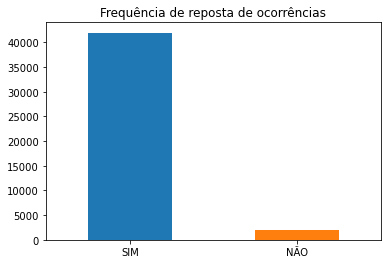

In [96]:
statuscolors = ['tab:blue','tab:orange']
status.plot.bar(color=statuscolors)
plt.title('Frequência de reposta de ocorrências')
plt.xticks(rotation=0)

In [8]:
#6 - Qual a quantidade de reclamações por Estado?
qtdeEstados = tabela['UF'].value_counts()
print(qtdeEstados)

SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64


# 6.a) 
##### Imagine que você é um Cientista de Dados responsável por medir a satisfação dos clientes. Para que você possa surpreender seu chefe, você deve fazer duas análises importantes sobre o data frame, incluindo no mínimo dois gráficos com suas devidas personalizações de titulo, nome dos eixos, legenda, estilos etc. Considere que, ao trazer informações relevantes para a empresa em que trabalha, mais chances de ter o seu trabalho reconhecido e de ser um profissional com maior valor no mercado. Capriche nos gráficos!
- Iremos analisar duas fontes:
- A) Grupo de problema
- B) Segmento
- Uma vez obtidos e apresentados os dados, serão apresentadas conclusões com base no cruzamento dos dois dados

In [175]:
# Gráfico Grupo de Problema
grupoProblema = pd.DataFrame({
    'Grupo de Problema':tabela['Grupo Problema'].value_counts()
})

array([<AxesSubplot:ylabel='Grupo de Problema'>], dtype=object)

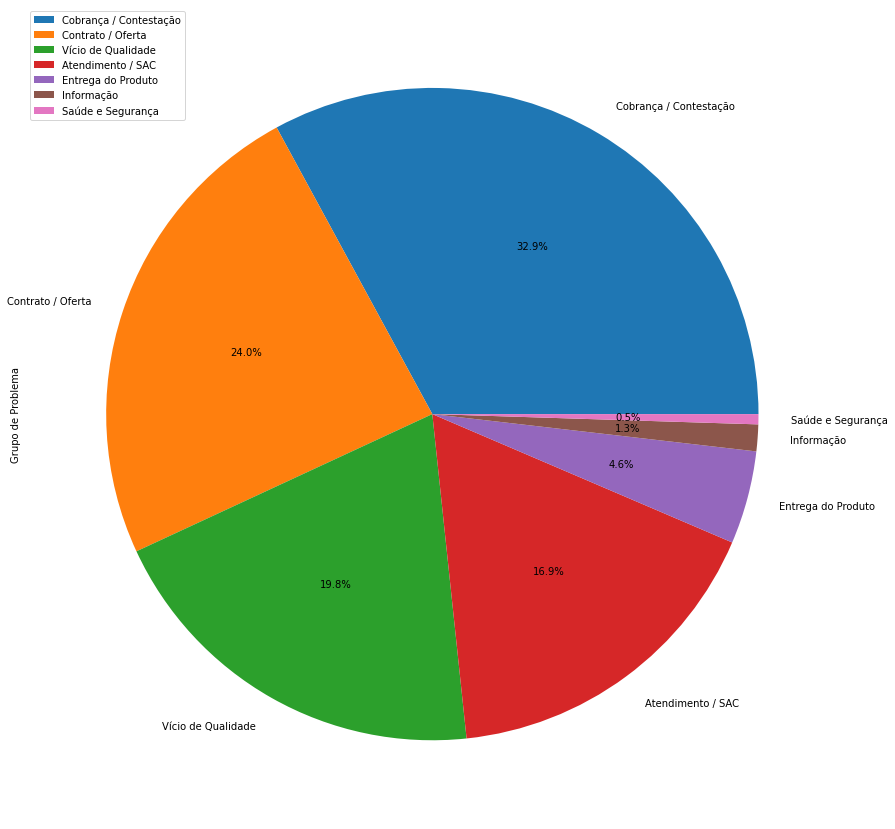

In [176]:
grupoProblema.plot.pie(subplots=True, figsize=(15,15), autopct='%1.1f%%')

In [177]:
# Gráfico de Segmento
segmento = tabela['Segmento de Mercado'].value_counts()
dfSegmento = pd.DataFrame({
    'Segmento de Mercado':segmento
})


Text(0.5, 0, 'Número de ocorrências')

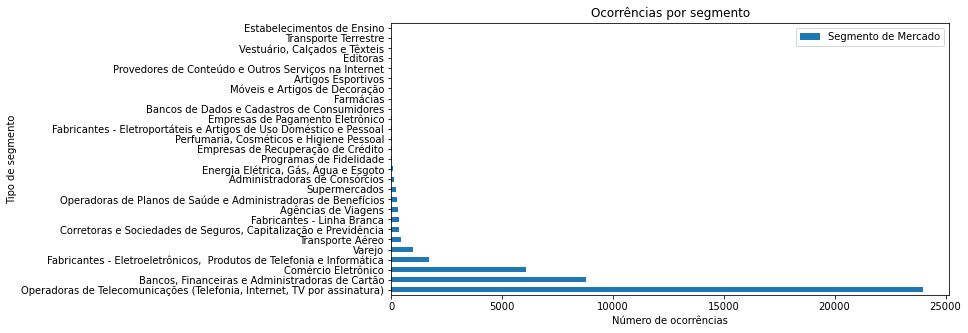

In [178]:
graphSegmento=dfSegmento.plot.barh(width = .5, figsize=(10,5))
graphSegmento.set_title('Ocorrências por segmento')
graphSegmento.set_ylabel('Tipo de segmento')
graphSegmento.set_xlabel('Número de ocorrências')


# Ánálise:
- Mais da metade dos tipos de ocorrência estão relacionados a dois grupos de problema: Cobrança/contestação e Contrato/Oferta
- O mesmo percentual também é corresponde a um único segmento concentrador de ocorrências: Operadoras de Telecomunicações.
- Evidencia-se a partir do gráfico a insatisfação do público com o nível mais básico de relacionamento entre empresa/consumidor, que é a consolidação do contrato e cobrança pelos serviços prestados.
- Essa corrosão na base do relacionamento pode ocasionar diversos transtornos para a empresa, sendo a preocupação mais imediata a inadimpência e a evasão do público e mesmo em caso de permanência no serviço - muitas vezes por falta de opção -, será criada uma barreira de ticket médio, pois a falta de confiança em uma relação que já começa e muitas vezes se mantém turbulenta tende a se solidificar, impedindo que o mesmo consumidor consuma mais produtos do portifólio oferecido e o torna mais propensa a evadir em caso de aparecimento de concorrência. Ou seja, a empresa deixa de ganhar mais, investindo menos com o público que já tem e por causa do risco de evasão, tende a gastar mais para ganhar novos clientes.
- É preciso evidenciar o gargalo onde a insatisfação é gerada, mapear todo o processo até a chegada do cliente no ponto de maior frustração, assinalar possíveis erros de comunicação institucional e marketing que possam gerar frustração entre a relação promessa x entrega e escrutinar os processos de cobrança indevida.